In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="Set2")

In [3]:
#  Load Dataset
file_path = 'C:/Users/hp/Downloads/country_delight_clean.csv'
df = pd.read_csv(file_path)

print("Initial Shape:", df.shape)
print(df.head())

Initial Shape: (122983, 34)
     location  total_land_area_acres  number_of_cows farm_size        date  \
0       Bihar             351.482551       91.840120    Medium  2019-10-19   
1   Rajasthan             770.990435       25.034385     Large  2022-12-28   
2  Chandigarh             245.545777       58.334806     Small  2021-12-01   
3  Chandigarh             710.714831       38.758725     Small  2019-06-15   
4       Delhi             200.576940       85.318326     Small  2021-09-24   

   product_id product_name         brand  quantity_liters_per_kg  \
0    4.541257       Cheese  Mother Dairy              474.455402   
1    8.628970         Curd           Raj              598.431142   
2    3.600437       Butter          Amul              273.955620   
3    8.546638         Ghee   Dodla Dairy              669.336674   
4    8.732560       Butter         Sudha              798.253557   

   price_per_unit   total_value  shelf_life_days storage_condition  \
0       25.772650   7895

In [4]:
#  Data Cleaning
## --- Strip extra spaces and standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
## --- Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 location                                 0
total_land_area_acres                    0
number_of_cows                           0
farm_size                                0
date                                     0
product_id                               0
product_name                             0
brand                                    0
quantity_liters_per_kg                   0
price_per_unit                           0
total_value                              0
shelf_life_days                          0
storage_condition                        0
production_date                          0
expiration_date                          0
quantity_sold_liters_per_kg              0
price_per_unit_sold                      0
approx_total_revenueinr                  0
customer_location                        0
sales_channel                            0
quantity_in_stock_liters_per_kg          0
minimum_stock_threshold_liters_per_kg    0
reorder_quantity_liters_per_kg      

In [6]:
## --- Handle duplicates
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (122983, 34)


In [8]:
 import warnings
warnings.filterwarnings('ignore')

In [9]:
## --- Handle missing numerical values (fill with median)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

In [10]:
## --- Handle missing categorical values (fill with mode)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
#  Feature Engineering
## --- Parse Date Column
df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
print(f"Invalid Dates: {df['date'].isna().sum()} rows")

Invalid Dates: 0 rows


In [12]:
## --- Drop invalid dates
df = df.dropna(subset=['date'])

In [13]:
## --- Time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week

In [14]:
df.columns

Index(['location', 'total_land_area_acres', 'number_of_cows', 'farm_size',
       'date', 'product_id', 'product_name', 'brand', 'quantity_liters_per_kg',
       'price_per_unit', 'total_value', 'shelf_life_days', 'storage_condition',
       'production_date', 'expiration_date', 'quantity_sold_liters_per_kg',
       'price_per_unit_sold', 'approx_total_revenueinr', 'customer_location',
       'sales_channel', 'quantity_in_stock_liters_per_kg',
       'minimum_stock_threshold_liters_per_kg',
       'reorder_quantity_liters_per_kg', 'year', 'month', 'month_name', 'week',
       'quarter', 'day', 'weekday', 'is_weekend', 'revenue_inr', 'age_days',
       'days_to_expiry', 'day_of_week'],
      dtype='object')

In [15]:
## --- Derived features
df['revenue'] = df['quantity_sold_liters_per_kg'] * df['price_per_unit_sold']
df['stock_utilization_%'] = np.where(df['quantity_in_stock_liters_per_kg'] > 0,
                                     (df['quantity_sold_liters_per_kg'] / df['quantity_in_stock_liters_per_kg']) * 100,
                                     0)
df['price_category'] = pd.cut(df['price_per_unit_sold'],
                              bins=[0, 50, 150, np.inf],
                              labels=['Low', 'Medium', 'High'])

df['revenue_category'] = pd.cut(df['revenue'],
                                bins=[0, 500, 2000, np.inf],
                                labels=['Low', 'Medium', 'High'])

print("\nFeature Engineering Completed. New Columns Added:")
print(df.columns)


Feature Engineering Completed. New Columns Added:
Index(['location', 'total_land_area_acres', 'number_of_cows', 'farm_size',
       'date', 'product_id', 'product_name', 'brand', 'quantity_liters_per_kg',
       'price_per_unit', 'total_value', 'shelf_life_days', 'storage_condition',
       'production_date', 'expiration_date', 'quantity_sold_liters_per_kg',
       'price_per_unit_sold', 'approx_total_revenueinr', 'customer_location',
       'sales_channel', 'quantity_in_stock_liters_per_kg',
       'minimum_stock_threshold_liters_per_kg',
       'reorder_quantity_liters_per_kg', 'year', 'month', 'month_name', 'week',
       'quarter', 'day', 'weekday', 'is_weekend', 'revenue_inr', 'age_days',
       'days_to_expiry', 'day_of_week', 'revenue', 'stock_utilization_%',
       'price_category', 'revenue_category'],
      dtype='object')


In [16]:
#  Exploratory Data Analysis
print("\nDataset Summary:\n", df.describe())


Dataset Summary:
        total_land_area_acres  number_of_cows                           date  \
count          122983.000000   122983.000000                         122983   
mean              505.275838       55.061073  2020-12-16 22:24:55.406682112   
min                10.170000       10.000000            2019-01-01 00:00:00   
25%               254.595695       32.508658            2019-12-22 00:00:00   
50%               510.473652       54.889920            2020-12-05 00:00:00   
75%               753.278409       77.549802            2021-12-14 00:00:00   
max               999.530000      100.000000            2022-12-28 00:00:00   
std               288.744055       26.311837                            NaN   

          product_id  quantity_liters_per_kg  price_per_unit    total_value  \
count  122983.000000           122983.000000   122983.000000  122983.000000   
mean        5.505363              500.372455       54.667341   27392.312102   
min         1.000000            

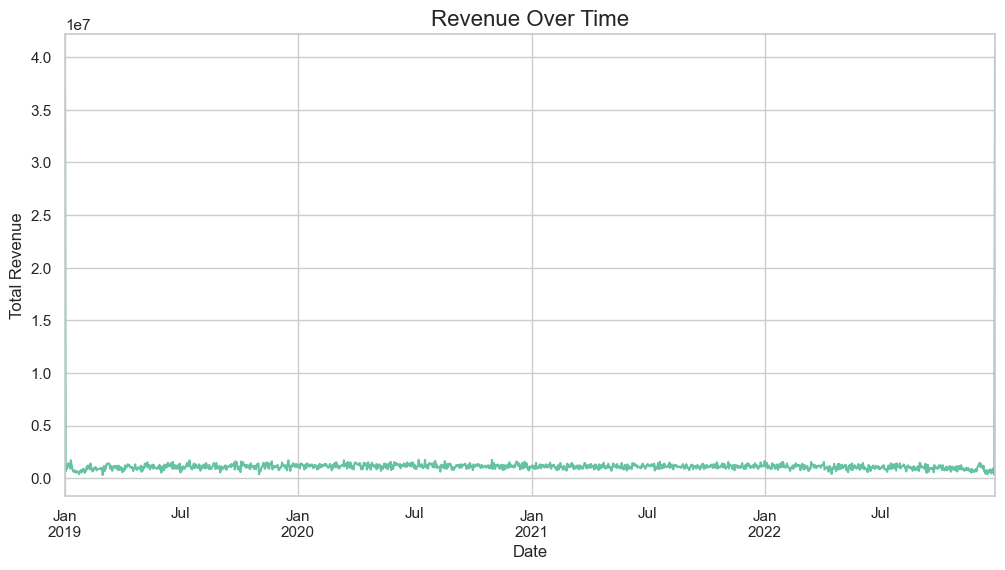

In [17]:
# 1--- Sales over time
plt.figure(figsize=(12,6))
df.groupby('date')['revenue'].sum().plot()
plt.title('Revenue Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

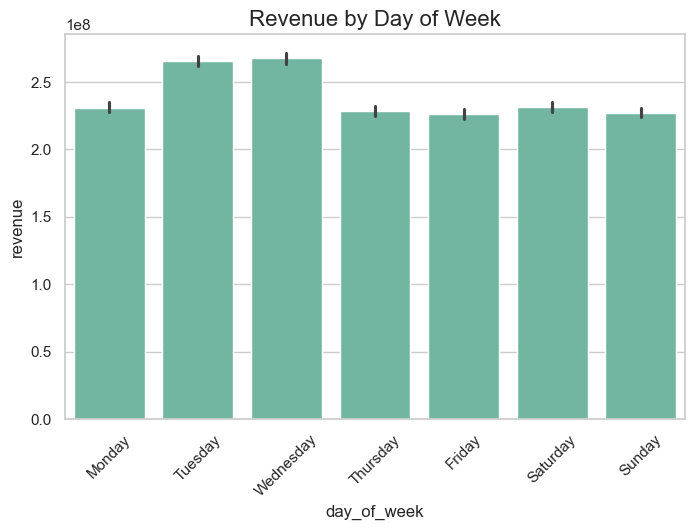

In [18]:
# 2--- Revenue by Day of Week
plt.figure(figsize=(8,5))
sns.barplot(x='day_of_week', y='revenue', data=df, estimator=sum, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Revenue by Day of Week', fontsize=16)
plt.xticks(rotation=45)
plt.show()

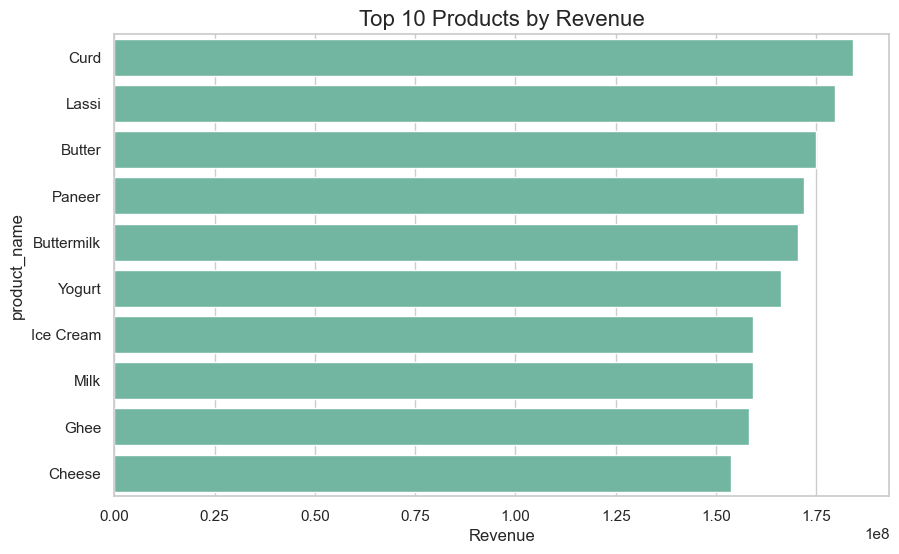

In [19]:
# 3--- Top 10 Products by Revenue
plt.figure(figsize=(10,6))
top_products = df.groupby('product_name')['revenue'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Revenue')
plt.show()

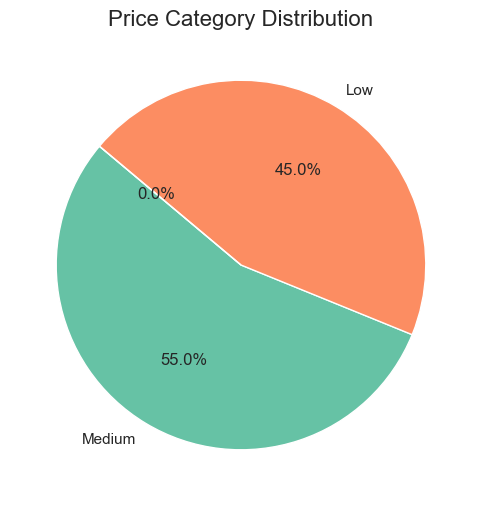

In [20]:
# 4--- Price Category Distribution
plt.figure(figsize=(6,6))
df['price_category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Price Category Distribution', fontsize=16)
plt.ylabel('')
plt.show()

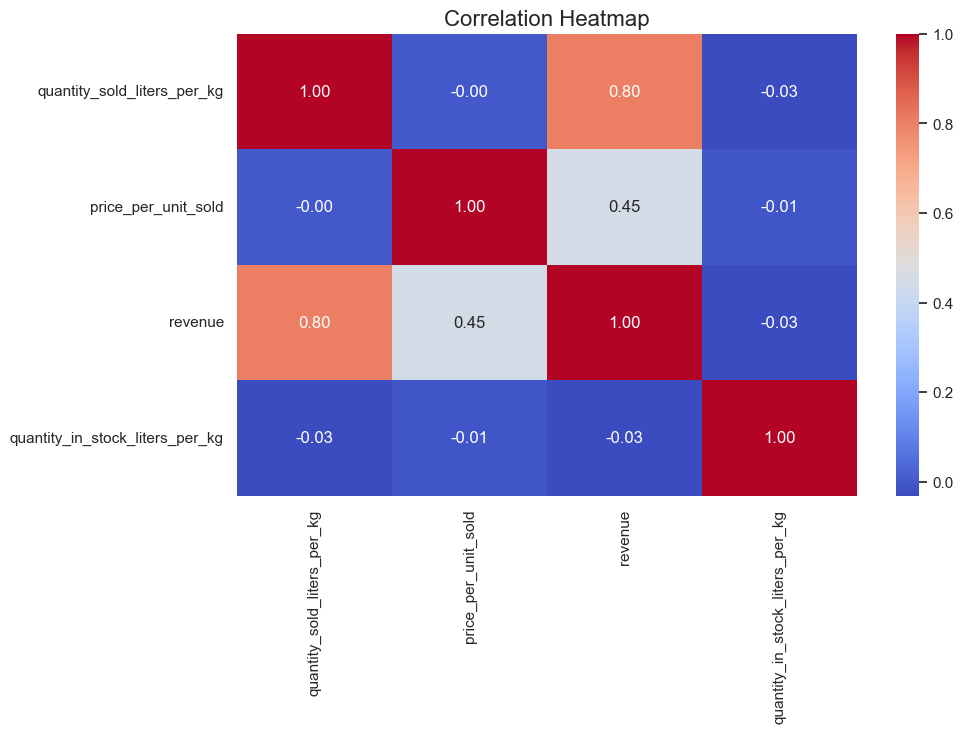

In [21]:
# 5--- Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['quantity_sold_liters_per_kg','price_per_unit_sold','revenue','quantity_in_stock_liters_per_kg']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

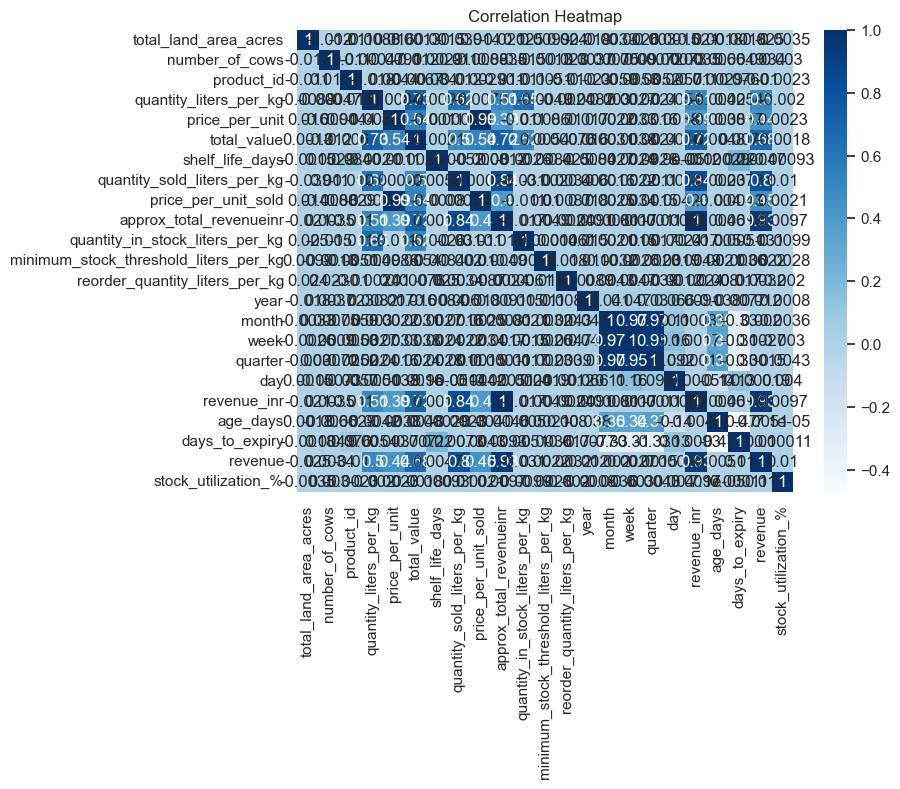

In [22]:
# 6. Heatmap of Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

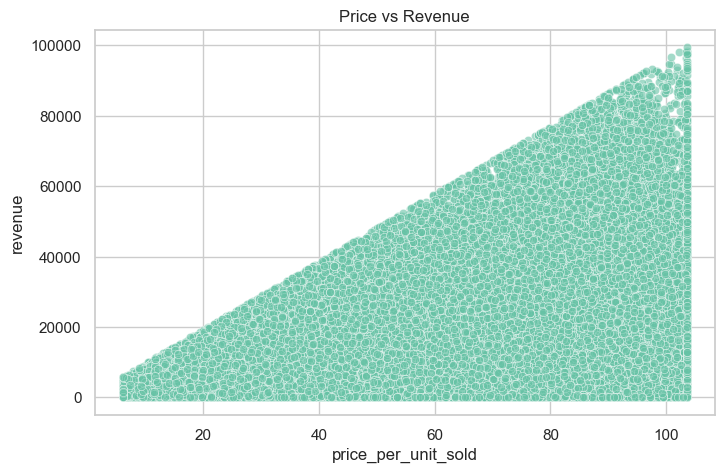

In [23]:
# 7. Price vs Revenue Scatter
if 'price_per_unit_sold' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x='price_per_unit_sold', y='revenue', alpha=0.6)
    plt.title("Price vs Revenue")
    plt.show()

In [28]:
df.columns

Index(['location', 'total_land_area_acres', 'number_of_cows', 'farm_size',
       'date', 'product_id', 'product_name', 'brand', 'quantity_liters_per_kg',
       'price_per_unit', 'total_value', 'shelf_life_days', 'storage_condition',
       'production_date', 'expiration_date', 'quantity_sold_liters_per_kg',
       'price_per_unit_sold', 'approx_total_revenueinr', 'customer_location',
       'sales_channel', 'quantity_in_stock_liters_per_kg',
       'minimum_stock_threshold_liters_per_kg',
       'reorder_quantity_liters_per_kg', 'year', 'month', 'month_name', 'week',
       'quarter', 'day', 'weekday', 'is_weekend', 'revenue_inr', 'age_days',
       'days_to_expiry', 'day_of_week', 'revenue', 'stock_utilization_%',
       'price_category', 'revenue_category'],
      dtype='object')

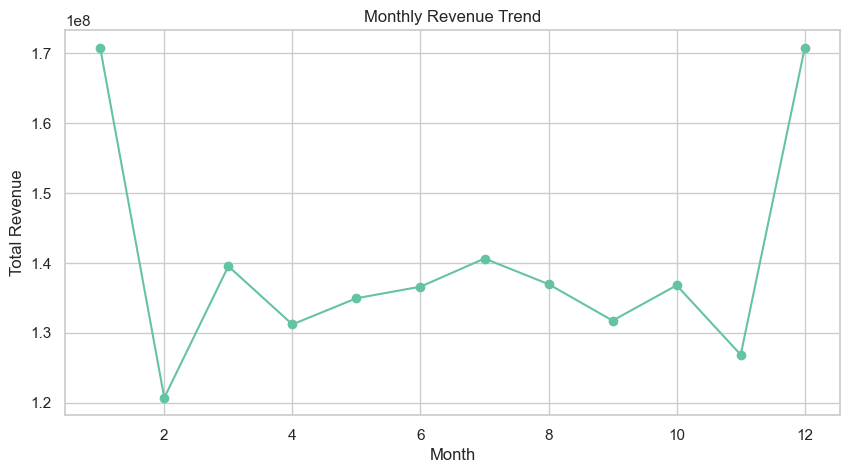

In [30]:
# 8. Monthly Trend
plt.figure(figsize=(10,5))
df.groupby('month')['revenue'].sum().plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

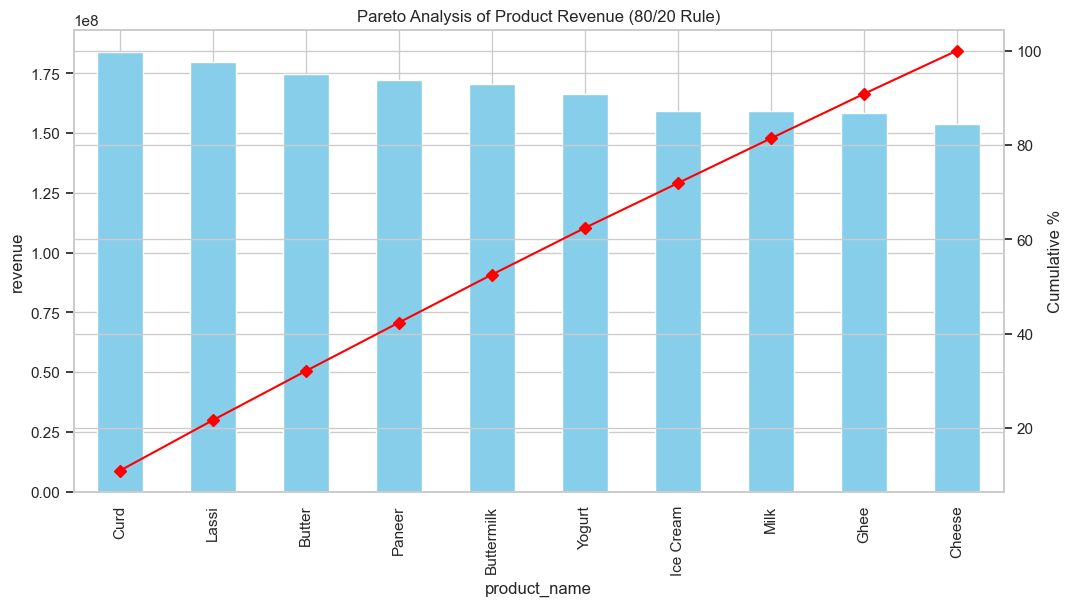

In [31]:
# 9. Pareto Chart for Products
if 'product_name' in df.columns:
    product_revenue = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False)
    cum_percentage = product_revenue.cumsum() / product_revenue.sum() * 100

    fig, ax1 = plt.subplots(figsize=(12,6))
    product_revenue.plot(kind='bar', ax=ax1, color='skyblue')
    ax2 = ax1.twinx()
    cum_percentage.plot(color='red', marker='D', ax=ax2)
    ax1.set_ylabel('revenue')
    ax2.set_ylabel('Cumulative %')
    plt.title("Pareto Analysis of Product Revenue (80/20 Rule)")
    plt.show()

In [ ]:
import plotly.express as px

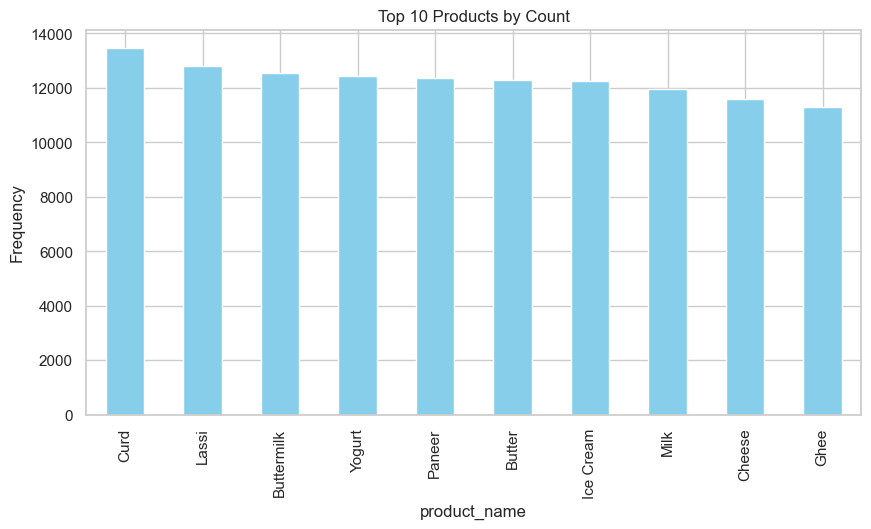

In [32]:
# 9. Product Category Count (if available)
if 'product_name' in df.columns:
    plt.figure(figsize=(10,5))
    df['product_name'].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 Products by Count")
    plt.ylabel("Frequency")
    plt.show()

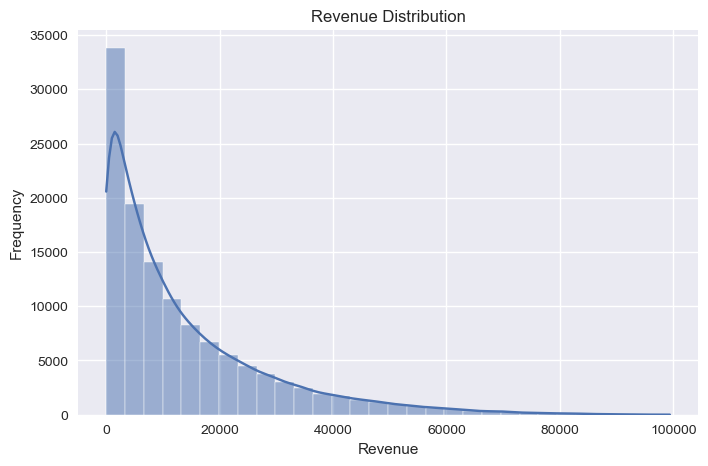

In [33]:
plt.style.use('seaborn-v0_8')
# 11. Distribution of Revenue
plt.figure(figsize=(8,5))
sns.histplot(df['revenue'], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

In [ ]:
output_path = "processed_country_delight.csv"
df.to_csv(output_path, index=False)
print(f"File saved at: {output_path}")